In [1]:
import pandas as pd

sessions = []

session1 = {
    "sessionID": 1,
    "session_start_datetime": "2024-01-16 08:00:00",
    "visited_pages": ["index", "productlist", "product_1", "checkout"],
    "session_flags": ["loggedin", "ordercompleted"],
    "user_coordinates": {"longitude": 10.00001, "latitude": 10.00002 }
}

session2 = {
    "sessionID": 2,
    "session_start_datetime": "2024-01-16 08:30:00",
    "visited_pages": ["index", "productlist", "product_2"],
    "session_flags": ["loggedin"],
    "user_coordinates": {"longitude": 10.00003, "latitude": 20.00003 }
}

session3 = {
    "sessionID": 3,
    "session_start_datetime": "2024-01-16 09:00:00",
    "visited_pages": ["index", "productlist", "product_1", "cart"],
    "session_flags": [],
    "user_coordinates": {"longitude": 10.00004, "latitude": 20.00004 }
}

for session in [session1, session2, session3]:
    session["session_start_datetime"] = pd.to_datetime(session["session_start_datetime"])
    
sessions.extend([session1, session2, session3])

sorted_sessions = sorted(sessions, key=lambda x: len(x["visited_pages"]), reverse=True)

for session in sorted_sessions:
    print(f"Session ID: {session['sessionID']}")
    print(f"Start Datetime: {session['session_start_datetime']}")
    print(f"Visited Pages: {', '.join(session['visited_pages'])}")
    print(f"Session Flags: {', '.join(session['session_flags'])}")
    print(f"User Coordinates: Latitude {session['user_coordinates']['latitude']}, Longitude {session['user_coordinates']['longitude']}")
    print()


Session ID: 1
Start Datetime: 2024-01-16 08:00:00
Visited Pages: index, productlist, product_1, checkout
Session Flags: loggedin, ordercompleted
User Coordinates: Latitude 10.00002, Longitude 10.00001

Session ID: 3
Start Datetime: 2024-01-16 09:00:00
Visited Pages: index, productlist, product_1, cart
Session Flags: 
User Coordinates: Latitude 20.00004, Longitude 10.00004

Session ID: 2
Start Datetime: 2024-01-16 08:30:00
Visited Pages: index, productlist, product_2
Session Flags: loggedin
User Coordinates: Latitude 20.00003, Longitude 10.00003



In [7]:
import re

def tf(text: str) -> dict:
    words = re.findall(r'\w+', text.lower())
    
    total_words = len(words)
    word_count = {}
    
    for word in words:
        word_count[word] = word_count.get(word, 0) + 1

    word_frequencies = {word: count / total_words for word, count in word_count.items()}
    
    return word_frequencies

text = "Live is life, Na, na, na, na-na"
result = tf(text)
# print(result)
result

{'live': 0.125, 'is': 0.125, 'life': 0.125, 'na': 0.625}

In [8]:
import numpy as np
import pandas as pd

url = "https://raw.githubusercontent.com/DmitryPavlyuk/python-da/main/week4/iris.csv"
iris_data = pd.read_csv(url, header=None, skiprows=1)

y = iris_data.iloc[:, 0].values
X = iris_data.iloc[:, 1:4].values
X = np.column_stack((np.ones(X.shape[0]), X))

XtX = np.dot(X.T, X)
XtX_inv = np.linalg.inv(XtX)
XtX_inv_Xt = np.dot(XtX_inv, X.T)
beta = np.dot(XtX_inv_Xt, y)

beta

array([ 1.85599749,  0.65083716,  0.70913196, -0.55648266])

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/DmitryPavlyuk/python-da/main/week4/iris.csv"
df = pd.read_csv(url)

variety_mean_sepal_length = df.groupby('variety')['sepal.length'].mean().reset_index()
variety_mean_sepal_length.columns = ['variety', 'mean_sepal_length']

df = df.merge(variety_mean_sepal_length, on='variety')

print(df.sample(10))

     sepal.length  sepal.width  petal.length  petal.width     variety  \
27            5.2          3.5           1.5          0.2      Setosa   
147           6.5          3.0           5.2          2.0   Virginica   
55            5.7          2.8           4.5          1.3  Versicolor   
130           7.4          2.8           6.1          1.9   Virginica   
115           6.4          3.2           5.3          2.3   Virginica   
119           6.0          2.2           5.0          1.5   Virginica   
95            5.7          3.0           4.2          1.2  Versicolor   
19            5.1          3.8           1.5          0.3      Setosa   
62            6.0          2.2           4.0          1.0  Versicolor   
21            5.1          3.7           1.5          0.4      Setosa   

     mean_sepal_length  
27               5.006  
147              6.588  
55               5.936  
130              6.588  
115              6.588  
119              6.588  
95               5.93

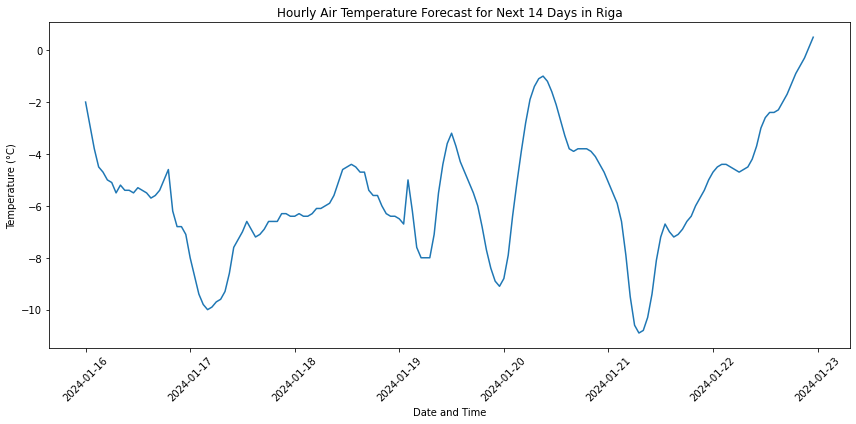

In [5]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

api_url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 56.9496,
    "longitude": 24.1052,
    "hourly": "temperature_2m",
    "start": datetime.now().strftime("%Y-%m-%d"),
    "end": (datetime.now() + pd.Timedelta(days=14)).strftime("%Y-%m-%d")
}


response = requests.get(api_url, params=params)

if response.status_code == 200:
    weather_data = response.json()
    temperatures = weather_data['hourly']['temperature_2m']
    timestamps = weather_data['hourly']['time']

    dates = [datetime.fromisoformat(ts) for ts in timestamps]

    plt.figure(figsize=(12, 6))
    sns.lineplot(x=dates, y=temperatures)
    plt.title("Hourly Air Temperature Forecast for Next 14 Days in Riga")
    plt.xlabel("Date and Time")
    plt.ylabel("Temperature (°C)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Failed to retrieve data from Open-Meteo API")